# DataScience Project ´17

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import *
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import *
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import VarianceThreshold
import xgboost as xgb
import math
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.cross_decomposition import PLSRegression
from sklearn.cluster import KMeans
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Defining Modelvalidation function

In [3]:
def Modelvalidation(model,x,y,splitsize=0.3,takelog=True,iterations=10):
    repeated_rmsle=np.zeros(iterations)
    for j in range(iterations):
        rmsle=0
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=splitsize)
        if takelog==True:
            y_train=np.log(y_train)
        regressionfit=model.fit(x_train,y_train)
        if takelog==True:
            prediction=np.exp(regressionfit.predict(x_test))
        if takelog==False:
            prediction=regressionfit.predict(x_test)
        for i in range(len(y_test)):
            if(prediction[i]<=0):
                prediction[i]=np.mean(y_train)
            rmsle += (math.log(y_test[i]+1) - math.log(prediction[i]+1))**2
        rmsle=(rmsle/len(y_test))**0.5
        repeated_rmsle[j]=rmsle
    return(repeated_rmsle)

In [4]:
def Two_Modelvalidation(model1,model2,x,y,splitsize=0.3,takelog=True,iterations=10,model1imp=0.5):
    repeated_rmsle=np.zeros(iterations)
    for j in range(iterations):
        rmsle=0
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=splitsize)
        if takelog==True:
            y_train=np.log(y_train)
        regressionfit_model1=model1.fit(x_train,y_train)
        regressionfit_model2=model2.fit(x_train,y_train)
        if takelog==True:
            prediction_model1=np.exp(regressionfit_model1.predict(x_test))
            prediction_model2=np.exp(regressionfit_model2.predict(x_test))
        if takelog==False:
            prediction_model1=regressionfit_model1.predict(x_test)
            prediction_model2=regressionfit_model2.predict(x_test)
        for i in range(len(y_test)):
            if(prediction_model1[i]<=0):
                prediction_model1[i]=np.mean(y_train)
            if(prediction_model2[i]<=0):
                prediction_model2[i]=np.mean(y_train)
            prediction = model1imp*prediction_model1 + (1-model1imp)*prediction_model2
            rmsle += (math.log(y_test[i]+1) - math.log(prediction[i]+1))**2
        rmsle=(rmsle/len(y_test))**0.5
        repeated_rmsle[j]=rmsle
    return(repeated_rmsle)

# Load dataset

In [7]:
train = pd.read_csv('/resources/data/samples/DataScienceProjekt17/train.csv')
test = pd.read_csv('/resources/data/samples/DataScienceProjekt17/test.csv')
y = train.pop('SalePrice')
variables = pd.concat([train, test], keys=['train', 'test'])
print(variables.shape)
print(variables.columns)

(2919, 80)
Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 

# Graphs

Plot of the selling price

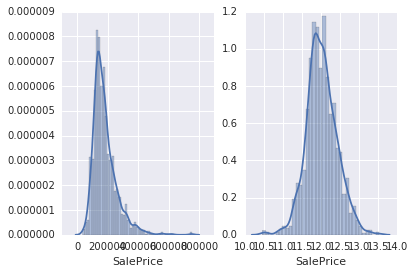

In [8]:
fig, axs = plt.subplots(ncols=2)
sns.distplot(y,ax=axs[0])
sns.distplot(np.log(y),ax=axs[1])

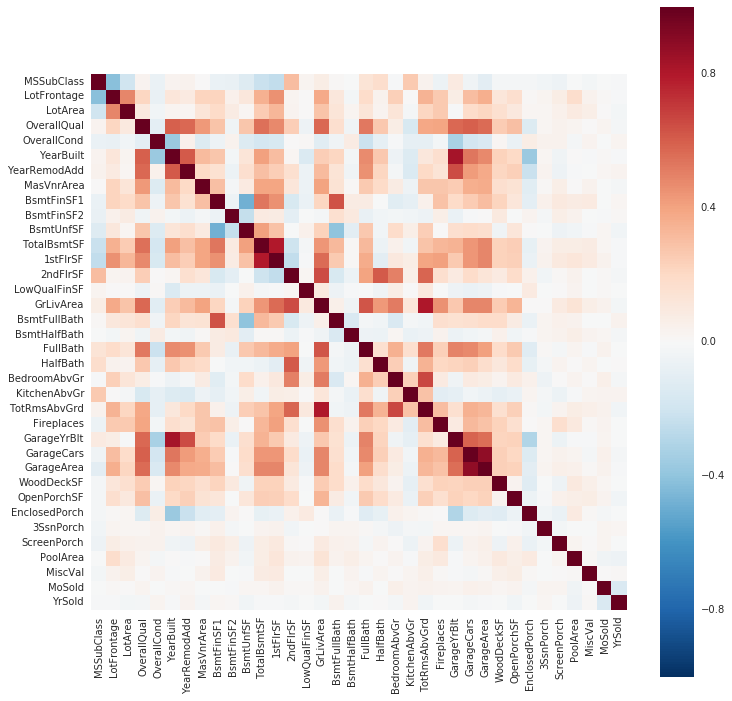

In [9]:
numericalFeaturesCorr = variables.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(numericalFeaturesCorr , vmax=1, square=True)

Plot of the neighborhood

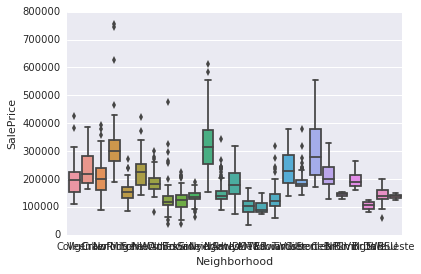

In [10]:
sns.boxplot(y=y,x=train.Neighborhood)

Scatterplot of price and living area

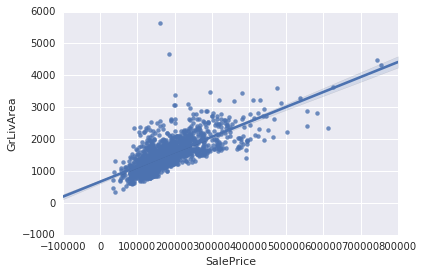

In [11]:
sns.regplot(y,variables.loc['train'].GrLivArea)

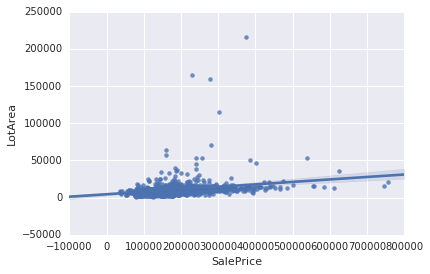

In [8]:
sns.regplot(y,variables.loc['train'].LotArea)

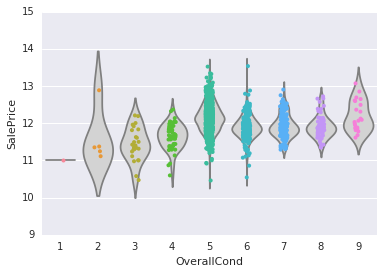

In [12]:
sns.violinplot(x=train.OverallCond, y=np.log(y), inner=None, color='lightgray', scale= 'width')
sns.stripplot(x=train.OverallCond, y=np.log(y), size=4, jitter=True)

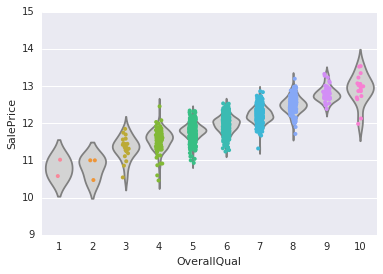

In [13]:
sns.violinplot(x=train.OverallQual, y=np.log(y), inner=None, color='lightgray',scale= 'width')
sns.stripplot(x=train.OverallQual, y=np.log(y), size=4, jitter=True)

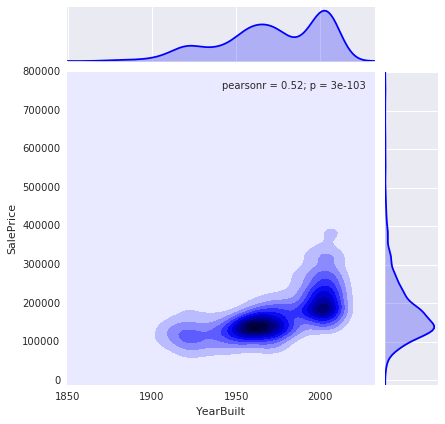

In [14]:
sns.jointplot(x= train.YearBuilt, y=y, kind="kde", color="b")

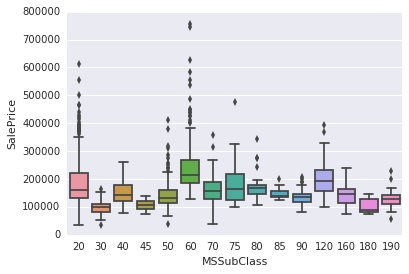

In [15]:
sns.boxplot(y=y,x=train.MSSubClass)

# Basic Model

In [16]:
train = pd.read_csv('/resources/data/samples/DataScienceProjekt17/train.csv')
test = pd.read_csv('/resources/data/samples/DataScienceProjekt17/test.csv')
y = train.pop('SalePrice')
variables = pd.concat([train, test], keys=['train', 'test'])
variables.drop(['Id','MoSold'], axis=1, inplace=True)
variables.MSSubClass=variables.MSSubClass.astype(str)
variables.OverallQual=variables.OverallQual.astype(str)
variables.OverallCond=variables.OverallCond.astype(str)
variables.YrSold=variables.YrSold.astype(str)

Fill missing values with the median (numeric) or the mode (category)

In [17]:
numericalFeatures = variables.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]
nonnumericalFeatures = variables.select_dtypes(include = ['object']).iloc[:, 1:]
for i in range(numericalFeatures.shape[1]):
    numericalFeatures.iloc[:,i]=numericalFeatures.iloc[:,i].fillna(numericalFeatures.iloc[:,i].median())
for i in range(nonnumericalFeatures.shape[1]):
    nonnumericalFeatures.iloc[:,i]=nonnumericalFeatures.iloc[:,i].fillna(nonnumericalFeatures.iloc[:,i].mode()[0]) 
    nonnumericalFeatures=pd.get_dummies(nonnumericalFeatures)
final=pd.concat([numericalFeatures,nonnumericalFeatures],axis=1)
y = y.values
x = final.loc['train'].select_dtypes(include=[np.number])
final_set = final.loc['test'].select_dtypes(include=[np.number]).values

## Lasso regression with basic model and parameter selection:

0.139311453109


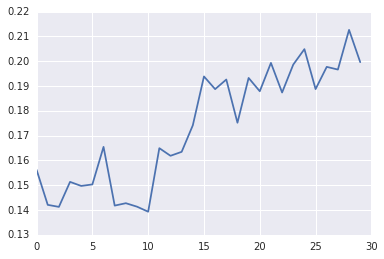

In [25]:
parameter=np.logspace(-4.5,0,30)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(linear_model.Lasso(alpha=parameter[i]),x,y).mean()
plt.plot(results)
print(results.min())
print(parameter[np.argmin(results)])

In [26]:
lassomodel=linear_model.LassoCV().fit(x,np.log(y))

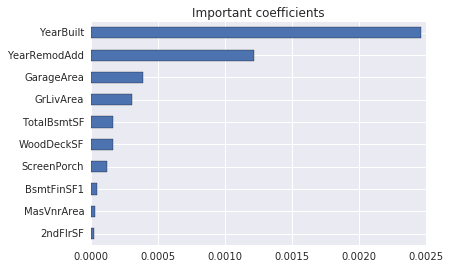

In [29]:
lassocoef=pd.Series(lassomodel.coef_, index = final.columns)
lassocoef=pd.concat([lassocoef.sort_values().tail(10)])
lassocoef.plot(kind = "barh")
plt.title("Important coefficients")

# Feature engineering

In [139]:
def ClusterMap(classmeans, nclust=3):
    cluster=KMeans(n_clusters=nclust)
    fitcluster=cluster.fit(classmeans.reshape(-1,1))
    pred=fitcluster.predict(classmeans.reshape(-1,1))
    neighborhood_map = classmeans
    for i in range(0, len(pred)):
        neighborhood_map[i] = pred[i]
    return(neighborhood_map)

In [148]:
train = pd.read_csv('/resources/data/samples/DataScienceProjekt17/train.csv')
test = pd.read_csv('/resources/data/samples/DataScienceProjekt17/test.csv')
train.drop(train.SalePrice.sort_values().head(5).index,axis=0,inplace=True)
train.drop(train.SalePrice.sort_values().tail(5).index,axis=0,inplace=True)
y = train.pop('SalePrice')3
variables = pd.concat([train, test], keys=['train', 'test'])
variables.MSSubClass=variables.MSSubClass.astype(str)

In [149]:
variables["NewHouse"] = (variables["YearBuilt"] == variables["YrSold"]) .astype(int)
variables["2ndFloorAvail"] = (variables["2ndFlrSF"] == 0) .astype(int)
variables["MasVnrAvail"] = (variables["MasVnrArea"] == 0) .astype(int)
variables["WoodDeckAvail"] = (variables["WoodDeckSF"] == 0).astype(int)
variables["OpenPorchAvail"] = (variables["OpenPorchSF"] == 0) .astype(int)
variables["EnclosedPorchAvail"] = (variables["EnclosedPorch"] == 0) .astype(int)
variables["3SsnPorchAvail"] = (variables["3SsnPorch"] == 0).astype(int)
variables["ScreenPorchAvail"] = (variables["ScreenPorch"] == 0).astype(int)

In [150]:
variables["MasVnrArea"].fillna(0, inplace=True)
variables["BsmtFinSF1"].fillna(0, inplace=True)
variables["BsmtFinSF2"].fillna(0, inplace=True)
variables["BsmtUnfSF"].fillna(0, inplace=True)
variables["TotalBsmtSF"].fillna(0, inplace=True)
variables["GarageArea"].fillna(0, inplace=True)
variables["BsmtFullBath"].fillna(0, inplace=True)
variables["BsmtHalfBath"].fillna(0, inplace=True)
variables["GarageCars"].fillna(0, inplace=True)
variables['HouseAge']=variables.YearBuilt.max()-variables.YearBuilt+1
variables.drop(('YearBuilt'),axis=1,inplace=True)
variables['RemodAge']=variables.YearRemodAdd.max()-variables.YearRemodAdd
variables.drop(('YearRemodAdd'),axis=1,inplace=True)
variables['TotalSF'] = variables['TotalBsmtSF'] + variables['1stFlrSF'] + variables['2ndFlrSF']
variables['MasVnrType'] = variables['MasVnrType'].fillna(variables['MasVnrType'].mode()[0])
# seems to have a similar effect
variables['Electrical'] = variables['Electrical'].fillna(variables['Electrical'].mode()[0])
variables.Electrical[variables.Electrical=='FuseP']='FuseF'
variables['KitchenQual'] = variables['KitchenQual'].fillna(variables['KitchenQual'].mode()[0])

In [151]:
variables.OverallCond = variables.OverallCond.astype(str)
variables.OverallCond = 'Cond' + variables.OverallCond
variables.OverallQual = variables.OverallQual.astype(str)
variables.OverallQual = 'Qual' + variables.OverallQual
variables['FireplaceQu'] = variables['FireplaceQu'].fillna('NoFP')
variables.YrSold[variables['YrSold']<=2007]='older2007'
variables.YrSold[variables['YrSold']!='older2007']='newer2007'
variables['YrSold'] = variables['YrSold'].astype(str)
seasons={1:'Winter',2:'Winter',3:'Spring',4:'Spring',5:'Spring',6:'Sommer',7:'Sommer',
           8:'Sommmer',9:'Fall',10:'Fall',11:'Winter',12:'Winter'}
variables['SeasonSold']=variables['MoSold'].map(seasons)
variables.drop(('MoSold'),axis=1,inplace=True)

In [152]:
# Cluster Neighborhood
classmeans=y.groupby(train.Neighborhood).median()
neighborhood_map = ClusterMap(classmeans,nclust=7)
variables.Neighborhood = variables.Neighborhood.map(neighborhood_map)
variables.Neighborhood = variables.Neighborhood.astype(str)
variables.Neighborhood = 'Neighbor' + variables.Neighborhood
# Cluster Zoning
variables['MSZoning'] = variables['MSZoning'].fillna(variables['MSZoning'].mode()[0])
variables.MSZoning = variables.MSZoning.astype(str)
classmeans=y.groupby(train.MSZoning).median()
variables.MSZoning = variables.MSZoning.map(ClusterMap(classmeans,nclust=4))
variables.MSZoning = variables.MSZoning.astype(str)
variables.MSZoning = 'MSZoning' + variables.MSZoning
# Cluster SubClass
variables['MSSubClass'] = variables['MSSubClass'].fillna(variables['MSSubClass'].mode()[0])
variables.MSSubClass[variables.MSSubClass==150]= variables['MSSubClass'].mode()[0] # for unknown category
variables.MSSubClass = variables.MSSubClass.astype(str)
variables.MSSubClass = 'MSSubClass' + variables.MSSubClass
classmeans=y.groupby('MSSubClass' + train.MSSubClass.astype(str)).median()
variables.MSSubClass = variables.MSSubClass.map(ClusterMap(classmeans,nclust=3))
variables.MSSubClass = variables.MSSubClass.astype(str)
variables.MSSubClass = 'MSSubClass' + variables.MSSubClass
# Cluster Saletype
variables['SaleType'] = variables['SaleType'].fillna(variables['SaleType'].mode()[0])
variables.SaleType = variables.SaleType.astype(str)
classmeans=y.groupby(train.SaleType).median()
variables.SaleType = variables.SaleType.map(ClusterMap(classmeans,nclust=3))
variables.SaleType = variables.SaleType.astype(str)
# Cluster LotConfig
variables['LotConfig'] = variables['LotConfig'].fillna(variables['LotConfig'].mode()[0])
variables.LotConfig = variables.LotConfig.astype(str)
classmeans=y.groupby(train.LotConfig).median()
variables.LotConfig = variables.LotConfig.map(ClusterMap(classmeans,nclust=4))
variables.LotConfig = variables.LotConfig.astype(str)
# Cluster LotConfig
variables['RoofStyle'] = variables['RoofStyle'].fillna(variables['RoofStyle'].mode()[0])
variables.RoofStyle = variables.RoofStyle.astype(str)
classmeans=y.groupby(train.RoofStyle).mean()
variables.RoofStyle = variables.RoofStyle.map(ClusterMap(classmeans,nclust=4))
variables.RoofStyle = variables.RoofStyle.astype(str)
# Cluster LotConfig
variables['Exterior1st'] = variables['Exterior1st'].fillna(variables['Exterior1st'].mode()[0])
variables.Exterior1st = variables.Exterior1st.astype(str)
classmeans=y.groupby(train.Exterior1st).median()
variables.Exterior1st = variables.Exterior1st.map(ClusterMap(classmeans,nclust=4))
variables.Exterior1st = variables.Exterior1st.astype(str)

In [153]:
numericalFeatures = variables.select_dtypes(include = ['float64', 'int64']).iloc[:, 1:]
nonnumericalFeatures = variables.select_dtypes(include = ['object']).iloc[:, 1:]
for i in range(numericalFeatures.shape[1]):
    numericalFeatures.iloc[:,i]=numericalFeatures.iloc[:,i].fillna(numericalFeatures.iloc[:,i].median())
    if len(np.unique(numericalFeatures.iloc[:,15]))>2:
          if numericalFeatures.iloc[:,i].skew()>0.75:
                numericalFeatures.iloc[:,i]=np.log(numericalFeatures.iloc[:,i]+1)
for i in range(nonnumericalFeatures.shape[1]):
    nonnumericalFeatures.iloc[:,i]=nonnumericalFeatures.iloc[:,i].fillna(nonnumericalFeatures.iloc[:,i].mode()[0]) 
    nonnumericalFeatures=pd.get_dummies(nonnumericalFeatures)
    
numericalFeatures=(numericalFeatures - numericalFeatures.loc['train'].mean())/numericalFeatures.loc['train'].std()   

In [154]:
final=pd.concat([numericalFeatures,nonnumericalFeatures],axis=1)
y = y.values
x = final.loc['train'].select_dtypes(include=[np.number])
final_set = final.loc['test'].select_dtypes(include=[np.number]).values

# Lasso Regression and finding optimal tuning parameter

0.123163978798
0.000257191380906


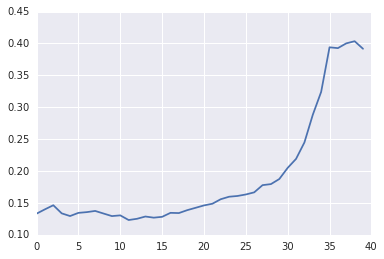

In [155]:
parameter=np.logspace(-5,0,40)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(linear_model.Lasso(alpha=parameter[i]),x,y).mean()
plt.plot(results)   
print(results.min())
print(parameter[np.argmin(results)])

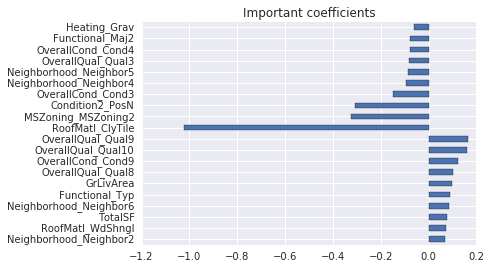

In [113]:
lassomodel=linear_model.LassoCV().fit(x,np.log(y))
lassocoef=pd.Series(lassomodel.coef_, index = final.columns)
lassocoef=pd.concat([lassocoef.sort_values().tail(10),lassocoef.sort_values().head(10)])
lassocoef.plot(kind = "barh")
plt.title("Important coefficients")

# Ridge Regression and finding optimal tuning parameter

0.130020520134
24.2446201708


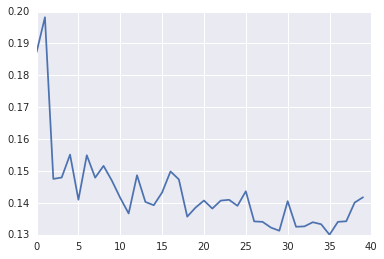

In [114]:
parameter=np.logspace(-4,2,40)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(linear_model.Ridge(alpha=parameter[i]),x,y).mean()
plt.plot(results)
print(results.min())
print(parameter[np.argmin(results)])

Optimal alpha should be around 12 with an error around 0.13

# Bayesian Ridge Regression

In [115]:
Modelvalidation(linear_model.BayesianRidge(),x,y).mean()

0.1346908290843484

# Elastic Net Model

0.129193700085


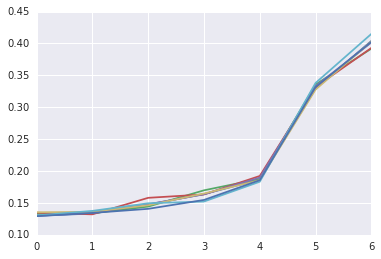

In [117]:
parameter=np.logspace(-2,0,7)
parameter2=np.logspace(-2,0,7)
results=np.ndarray(shape=(len(parameter),len(parameter2)))
for i in range(len(parameter)):
    for j in range(len(parameter2)):
        results[i,j]=Modelvalidation(linear_model.ElasticNet(max_iter=3000,l1_ratio=parameter[i],alpha=parameter2[i]),x,y).mean()
plt.plot(results)    
print(results.min())

# Gradient Boosting

0.132912805484


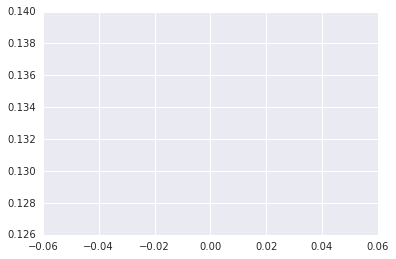

In [119]:
parameter=np.arange(2,7,6)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=parameter[i], max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
        ,x,y,iterations=5).mean()
plt.plot(results)
print(results.min())

# RandomForest

In [120]:
parameter=np.arange(1000,3000,2)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(RandomForestRegressor(n_estimators=parameter[i])
        ,x,y,iterations=1).mean() 
plt.plot(results)   
print(results.min())

KeyboardInterrupt: 

# Extreme Gradient Boosting

In [ ]:
parameter=np.arange(3,6,4)
results=np.zeros(len(parameter))
for i in range(len(parameter)):
    results[i]=Modelvalidation(xgb.XGBRegressor(colsample_bytree=0.2, gamma=0.0, learning_rate=0.05, max_depth=6,
                               min_child_weight=1.5, n_estimators=7200, reg_alpha=0.9, reg_lambda=0.6,subsample=0.2)
        ,x,y,iterations=1).mean()
plt.plot(results)  
print(results.min())

# Delauny Network

In [20]:
# by Nils Löhndorf
from sklearn.cluster import KMeans, AffinityPropagation
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import euclidean
from scipy.optimize import linprog
from cvxopt import matrix, solvers
from sklearn.preprocessing import StandardScaler
class DelaunayRegressor(object):
    
    _points = None
    _n_points = None
    _dim = None
    _coef = None
    _scaling = None
    
    def __init__(self, n_points=None, scaling=False):
        self._n_points = n_points
        self._scaling = scaling
    
    def fit(self, X, y):
        y = np.array(y)
        X = np.array(X)
        if self._n_points is None:
            kmeans = AffinityPropagation()
        else:
            kmeans = KMeans(n_clusters=self._n_points)
        if self._scaling:
            reg = LinearRegression()
            reg.fit(X,y)
            self._coef = reg.coef_
            X = X*self._coef
        else:
            self._scaler = StandardScaler()
            X = self._scaler.fit_transform(X)
        kmeans.fit(X)
        self._points = kmeans.cluster_centers_
        self._n_points, self._dim = self._points.shape
        weights = np.empty((X.shape[0],self._n_points))
        for i in range(len(X)):
            weights[i] = self.get_weights_qp(X[i])[1]
        reg = LinearRegression(fit_intercept=False)
        reg.fit(weights,y)
        self._means = reg.coef_

    def score(self, X, y):
        y = np.array(y)
        X = np.array(X)
        self._in_hull = 0
        rss = 0.
        if self._scaling:
            X = X*self._coef
        else:
            X = self._scaler.transform(X)
        y = np.array(y)
        for i in range(len(X)):
            error, weights = self.get_weights_qp(X[i])
            if error == 0:
                self._in_hull += 1
            rss += (weights.dot(self._means)-y[i])**2
        tss = ((y-y.mean())**2).sum()
        return (1-rss/tss)
    
    def predict(self, X):
        X = np.array(X)
        self._in_hull = 0
        if self._scaling:
            X = X*self._coef
        else:
            X = self._scaler.transform(X)
        if len(self._means.shape)==1:
            y_hat = np.zeros(X.shape[0])
        if len(self._means.shape)==2:
            y_hat = np.zeros((X.shape[0], self._means.shape[1]))
        for i in range(len(X)):
            error, weights = self.get_weights_qp(X[i])
            if error == 0:
                self._in_hull += 1
            y_hat[i] = weights.dot(self._means)
        return y_hat
    
    def get_weights_lp(self, point):
        points = self._points
        n_points = self._n_points
        c = np.array([euclidean(points[i], point) for i in range(n_points)])
        A = np.r_[points.T,np.ones((1,n_points))]
        b = np.r_[point, np.ones(1)]
        lp = linprog(c, A_eq=A, b_eq=b)
        return lp.success, lp.x
        
    def get_weights_qp(self, point):
        points = self._points
        n_points, dim = points.shape
        P = matrix(sum(np.outer(points.T[i],points.T[i]) for i in range(dim)))
        q = matrix(sum(-points.T[i]*point[i] for i in range(dim)))
        G = matrix(-np.identity(n_points))
        h = matrix(np.zeros(n_points))
        A = matrix(np.ones((1,n_points)))
        b = matrix(np.ones(1))
        sol = solvers.qp(P, q, G, h, A, b, options={"show_progress":False})
        weights = np.array([sol["x"][i] for i in range(n_points)])
        error = (((self._points.T).dot(weights)-point)**2).sum()
        if error < 1.e-7:
            success, weights_lp = self.get_weights_lp(point)
            if success:
                return 0.0, weights_lp
        return error, weights

In [15]:
parameter=np.arange(100,300,2)
results=np.zeros(len(parameter))
delaun=DelaunayRegressor(n_points=300)
for i in range(len(parameter)):
    results[i]=Modelvalidation(delaun
        ,x,y,iterations=2).mean()
plt.plot(results)    

AttributeError: 'NoneType' object has no attribute 'predict'

In [21]:
a=(delaun.fit(x,y))

In [ ]:
b=delaun.score(x,y)

# SVM Regression

0.201649044641


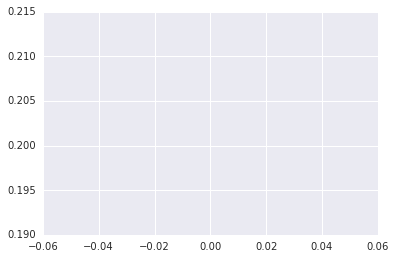

In [17]:
parameter=np.arange(0.1,5,10)
parameter2=np.arange(0.1,4,10)
results=np.ndarray(shape=(len(parameter),len(parameter2)))
for i in range(len(parameter)):
    for j in range(len(parameter2)):
        results[i,j]=Modelvalidation(SVR(C=parameter[i], epsilon=parameter2[j]),x,y).mean()
plt.plot(results)    
print(results.min())

# Ensemble the best regression with best tree

Estimating a good mixture parameter

In [593]:
model1=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
model2=linear_model.Ridge(alpha=30)
#model2=linear_model.BayesianRidge()

parameter=np.arange(0,1.1,0.1)
result=np.zeros(len(parameter))
for i in range(len(parameter)):
    result[i]=Two_Modelvalidation(model1,model2,x,y,takelog=True,model1imp=parameter[i]).mean()
plt.plot(result)

KeyboardInterrupt: 

Actual modelvalidation

0.123214798757


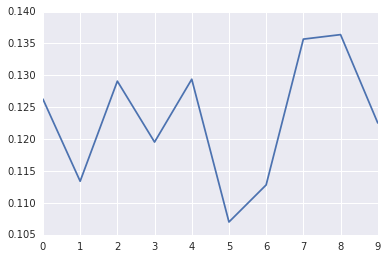

In [87]:
model1=GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05, max_depth=4, max_features='sqrt',
                                               min_samples_leaf=15, min_samples_split=10, loss='huber')
model2=linear_model.Ridge(alpha=12)

result=Two_Modelvalidation(model1,model2,x,y,takelog=True)
plt.plot(result)   
print(result.mean())

# Final prediction

In [88]:
model1_fit=model1.fit(x,np.log(y))
model2_fit=model2.fit(x,np.log(y))
prediction_model1=np.exp(model1_fit.predict(final_set))
prediction_model2=np.exp(model2_fit.predict(final_set))
prediction=(prediction_model1+prediction_model2)/2

In [89]:
prediction=pd.concat([test['Id'],pd.DataFrame(prediction)],axis=1)
prediction.columns=["Id","SalePrice"]
prediction.to_csv('submission.csv',index=False)